# Imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_breast_cancer, load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error as mse, mean_absolute_error as mae
from collections import Counter
from sklearn.preprocessing import StandardScaler

# Data

In [4]:
data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [6]:
X, y = df.drop(columns = 'target'), np.array(df['target']).reshape(-1,1)

# Linear Regression (Closed Form) 

In [8]:
W = np.array(np.linalg.inv(X.T @ X) @ X.T @ y).reshape(-1,1)

In [9]:
print(W.shape, X.shape)

(10, 1) (442, 10)


In [10]:
# Predicting
y_pred = X@W
df['pred'] = y_pred

In [11]:
print("MSE",mse(y,y_pred))
print("MAE",mae(y,y_pred))

MSE 26004.293351128865
MAE 152.1501958459668


In [12]:
# Adding bias vector
X_aug = np.hstack([np.ones((X.shape[0], 1)), X])
W = np.array(np.linalg.inv(X_aug.T @ X_aug) @ X_aug.T @ y).reshape(-1,1)
y_pred = X_aug@W
df['pred_with_bias'] = y_pred
df[['pred','target','pred_with_bias']].head()

,pred,target,pred_with_bias
0,53.983193,151.0,206.116677
1,-84.062451,75.0,68.071033
2,24.749306,141.0,176.882790
3,14.780974,206.0,166.914458
4,-23.671226,135.0,128.462258


In [13]:
print("MSE",mse(y,y_pred))
print("MAE",mae(y,y_pred))

MSE 2859.69634758675
MAE 43.27745202531507


# Linear Regression (GD) 

In [15]:
class LR:
    def __init__(self):
        
        self.m = None
        self.y = None
        self.X = None
        self.z = None
        self.w = None
        self.b = None

    def predict(self, test):
        return test@self.w + self.b
        
    def fit(self, X, y, lr, epochs):
        # update rule
        # loss = -(y log(p) + (1-y) log(1-p)
        # w = w + alpha (y - y_hat)X
        # b = b + alpha (y - y_hat)
        epsilon = 1e-8
        self.X = X
        self.y = y
        self.m = len(self.X)
        self.w = np.array(np.random.normal(0.0, 1.0, size=self.X.shape[1]).reshape(-1,1))
        self.b = np.array(np.random.normal(0.0, 1.0))
        loss = [] 
        
        for i in range(epochs):

            y_pred = np.array(self.X @ self.w + self.b)
            #print(y_pred.shape, y.shape)
            cost = np.mean((y_pred - y)**2)
            loss.append(cost)
            
            dw = self.X.T @ (y_pred - self.y) / self.m
            db = np.mean(y_pred - self.y)
            
            self.w -= lr * dw
            self.b -= lr * db

            if i%1000 == 0:
                print(i,cost)
            if cost <= epsilon:
                print(f"cost is low: {cost}")
                break
                
        return self.w, self.b, loss

In [16]:
model = LR()
w, b, loss = model.fit(X,y, lr = 0.1, epochs = 10000)

0 29248.26322930435
1000 3935.366772556958
2000 3407.7686850507775
3000 3194.4630781875744
4000 3079.603259659721
5000 3010.021752708692
6000 2966.0603043080446
7000 2937.7632858610004
8000 2919.323861314037
9000 2907.1776460162873


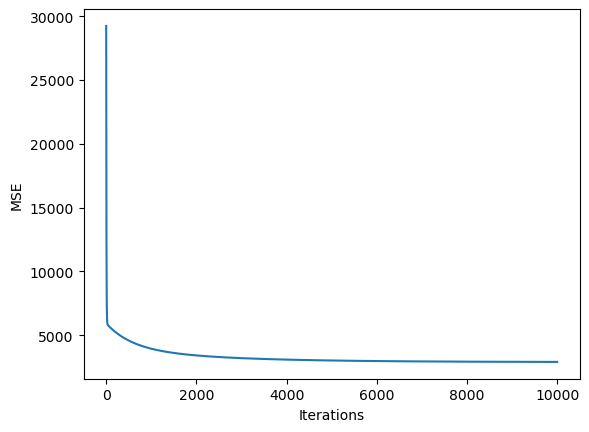

In [17]:
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.plot(loss);

In [18]:
y_pred = model.predict(X)
print("MSE",mse(y,y_pred))
print("MAE",mae(y,y_pred))

MSE 2899.090542657392
MAE 43.783938430771634


# Linear Regression Built-in 

In [20]:
lr = LinearRegression()
lr.fit(X,y)
y_pred = lr.predict(X)
print("MSE",mse(y,y_pred))
print("MAE",mae(y,y_pred))

MSE 2859.6963475867506
MAE 43.27745202531506


# Conclusion
<ol>
    <b><li> Don't forget to add bias vector to closed form.</li>
    <li>The built in Linear Regression got the same result as Closed form, and Linear Regression from scratch is very near to them.</li>
</ol>